In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
nba=pd.read_csv('NBA_Data.csv')
nba

,Date,Visitor,V_PTS,Home,H_PTS,Attendance,Arena,Location,Capacity,Yr Arena Opened,Season,H_Allstars,V_Allstars,V_wins,V_losses,H_wins,H_losses,V_WPercent,H_WPercent,Percent2Cap
0,2012-10-30 19:00:00,Washington Wizards,84,Cleveland Cavaliers,94,20562,Quicken Loans Arena,"Cleveland, Ohio",20562.0,1994,2012-13,1,0,0,0,0,0,0.000000,0.000000,1.000000
1,2012-10-30 19:30:00,Dallas Mavericks,99,Los Angeles Lakers,91,18997,Staples Center,"Los Angeles, California",18997.0,1992,2012-13,2,0,0,0,0,0,0.000000,0.000000,1.000000
2,2012-10-30 20:00:00,Boston Celtics,107,Miami Heat,120,20296,American Airlines Arena,"Miami, Florida",19600.0,1999,2012-13,3,2,0,0,0,0,0.000000,0.000000,1.035510
3,2012-10-31 19:00:00,Denver Nuggets,75,Philadelphia 76ers,84,19101,Wells Fargo Center,"Philadelphia, Pennsylvania",20328.0,1996,2012-13,1,0,0,0,0,0,0.000000,0.000000,0.939640
4,2012-10-31 19:00:00,Dallas Mavericks,94,Utah Jazz,113,17634,Vivint Smart Home Arena,"Salt Lake City, Utah",18303.0,1991,2012-13,0,0,1,0,0,0,1.000000,0.000000,0.963449
5,2012-10-31 19:00:00,Sacramento Kings,87,Chicago Bulls,93,21313,United Center,"Chicago, Illinois",20917.0,1994,2012-13,2,0,0,0,0,0,0.000000,0.000000,1.018932
6,2012-10-31 19:00:00,Indiana Pacers,90,Toronto Raptors,88,19800,Air Canada Centre,"Toronto, Ontario",19800.0,1999,2012-13,0,1,0,0,0,0,0.000000,0.000000,1.000000
7,2012-10-31 19:00:00,San Antonio Spurs,99,New Orleans Pelicans,95,15358,Smoothie King Center,"New Orleans, Louisiana",16867.0,1999,2012-13,0,2,0,0,0,0,0.000000,0.000000,0.910535
8,2012-10-31 19:30:00,Houston Rockets,105,Detroit Pistons,96,16646,Little Caesars Arena,"Detroit, Michigan",20491.0,2017,2012-13,0,1,0,0,0,0,0.000000,0.000000,0.812357
9,2012-10-31 19:30:00,Los Angeles Lakers,106,Portland Trail Blazers,116,20401,Moda Center,"Portland, Oregon",19980.0,1968,2012-13,1,2,0,1,0,0,0.000000,0.000000,1.021071


In [3]:
nba.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 20 columns):
Date               6364 non-null object
Visitor            6364 non-null object
V_PTS              6364 non-null int64
Home               6364 non-null object
H_PTS              6364 non-null int64
Attendance         6364 non-null int64
Arena              6364 non-null object
Location           6364 non-null object
Capacity           6364 non-null float64
Yr Arena Opened    6364 non-null object
Season             6364 non-null object
H_Allstars         6364 non-null int64
V_Allstars         6364 non-null int64
V_wins             6364 non-null int64
V_losses           6364 non-null int64
H_wins             6364 non-null int64
H_losses           6364 non-null int64
V_WPercent         6364 non-null float64
H_WPercent         6364 non-null float64
Percent2Cap        6364 non-null float64
dtypes: float64(4), int64(9), object(7)
memory usage: 994.5+ KB


In [4]:
#Change date back to datetime
nba['Date'] = pd.to_datetime(nba['Date'])


In [5]:
#number of games in dataset
len(nba)

6364

In [6]:
#Check data for null values
nba[nba.isnull().any(axis=1)]
#none returned

,Date,Visitor,V_PTS,Home,H_PTS,Attendance,Arena,Location,Capacity,Yr Arena Opened,Season,H_Allstars,V_Allstars,V_wins,V_losses,H_wins,H_losses,V_WPercent,H_WPercent,Percent2Cap


In [7]:
#Preview of dataset
nba.tail()

,Date,Visitor,V_PTS,Home,H_PTS,Attendance,Arena,Location,Capacity,Yr Arena Opened,Season,H_Allstars,V_Allstars,V_wins,V_losses,H_wins,H_losses,V_WPercent,H_WPercent,Percent2Cap
6359,2017-06-01 21:00:00,Cleveland Cavaliers,91,Golden State Warriors,113,19596,Oracle Arena,"Oakland, California",19596.0,1966,2017 Playoffs,4,3,12,1,12,0,0.923077,1.0000,1.0
6360,2017-06-04 20:00:00,Cleveland Cavaliers,113,Golden State Warriors,132,19596,Oracle Arena,"Oakland, California",19596.0,1966,2017 Playoffs,4,3,12,2,13,0,0.857143,1.0000,1.0
6361,2017-06-07 21:00:00,Golden State Warriors,118,Cleveland Cavaliers,113,20562,Quicken Loans Arena,"Cleveland, Ohio",20562.0,1994,2017 Playoffs,3,4,14,0,12,3,1.000000,0.8000,1.0
6362,2017-06-09 21:00:00,Golden State Warriors,116,Cleveland Cavaliers,137,20562,Quicken Loans Arena,"Cleveland, Ohio",20562.0,1994,2017 Playoffs,3,4,15,0,12,4,1.000000,0.7500,1.0
6363,2017-06-12 21:00:00,Cleveland Cavaliers,120,Golden State Warriors,129,19596,Oracle Arena,"Oakland, California",19596.0,1966,2017 Playoffs,4,3,13,4,15,1,0.764706,0.9375,1.0


In [8]:
#Seperate
nba_playoff = nba[nba['Season'].str.contains("Playoffs")]
nba = pd.concat([nba, nba_playoff]).drop_duplicates(keep=False)

In [10]:
#Descriptive statistics on entire data set
#print('Playoff Games')
#print(nba_playoff.describe())
print('Regular Season Games')
print(nba.describe())

Regular Season Games
             V_PTS        H_PTS    Attendance      Capacity   H_Allstars  \
count  5944.000000  5944.000000   5944.000000   5944.000000  5944.000000   
mean     99.945659   102.864906  17703.759926  18987.544078     0.917059   
std      12.017637    12.004686   2402.856773   1030.070161     0.875000   
min      58.000000    62.000000   7244.000000  16867.000000     0.000000   
25%      92.000000    95.000000  16354.000000  18119.000000     0.000000   
50%     100.000000   103.000000  18203.000000  19060.000000     1.000000   
75%     108.000000   111.000000  19591.250000  19800.000000     1.000000   
max     147.000000   149.000000  23152.000000  22300.000000     4.000000   

        V_Allstars       V_wins     V_losses       H_wins     H_losses  \
count  5944.000000  5944.000000  5944.000000  5944.000000  5944.000000   
mean      0.885935    19.590343    19.538526    19.971736    19.792396   
std       0.876206    13.836376    13.648290    13.876788    13.762412  

In [11]:
nba.describe()

,V_PTS,H_PTS,Attendance,Capacity,H_Allstars,V_Allstars,V_wins,V_losses,H_wins,H_losses,V_WPercent,H_WPercent,Percent2Cap
count,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000,5944.000000
mean,99.945659,102.864906,17703.759926,18987.544078,0.917059,0.885935,19.590343,19.538526,19.971736,19.792396,0.492389,0.494822,0.932968
std,12.017637,12.004686,2402.856773,1030.070161,0.875000,0.876206,13.836376,13.648290,13.876788,13.762412,0.200421,0.199077,0.118774
min,58.000000,62.000000,7244.000000,16867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.353521
25%,92.000000,95.000000,16354.000000,18119.000000,0.000000,0.000000,8.000000,8.000000,8.000000,8.000000,0.365385,0.367572,0.883431
50%,100.000000,103.000000,18203.000000,19060.000000,1.000000,1.000000,18.000000,18.000000,18.000000,18.000000,0.500000,0.500000,1.000000
75%,108.000000,111.000000,19591.250000,19800.000000,1.000000,1.000000,29.000000,29.000000,29.000000,29.000000,0.622951,0.627907,1.000000
max,147.000000,149.000000,23152.000000,22300.000000,4.000000,4.000000,69.000000,71.000000,70.000000,69.000000,1.000000,1.000000,1.106851


In [12]:
#Games where Arena did not sell out
#Oppurtunities for NBA teams to increase revenue 
print('# of Regular season games under arena capacity',len(nba.query('Attendance<Capacity')), 'out of',len(nba))
print('# of Playoff games under arena capacity',len(nba_playoff.query('Attendance<Capacity')), 'out of',len(nba_playoff))

# of Regular season games under arena capacity 2822 out of 5944
# of Playoff games under arena capacity 17 out of 420


# Focus on regular season games

In [13]:
#lowest=nba['Percent2Cap'].idxmin()
nba.loc[nba['Percent2Cap'].idxmin()]

Date                2016-12-11 18:00:00
Visitor              Philadelphia 76ers
V_PTS                                97
Home                    Detroit Pistons
H_PTS                                79
Attendance                         7244
Arena              Little Caesars Arena
Location              Detroit, Michigan
Capacity                          20491
Yr Arena Opened                    2017
Season                          2016-17
H_Allstars                            1
V_Allstars                            0
V_wins                                5
V_losses                             18
H_wins                               13
H_losses                             11
V_WPercent                     0.217391
H_WPercent                     0.541667
Percent2Cap                    0.353521
Name: 5441, dtype: object

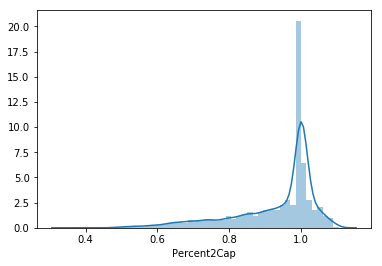

In [14]:
#histogram with Kernal Density Estimate
sns.distplot(nba['Percent2Cap']);

In [15]:
#skewness and kurtosis
print("Skewness: %f" % nba['Percent2Cap'].skew())
print("Kurtosis: %f" % nba['Percent2Cap'].kurt())

Skewness: -1.442225
Kurtosis: 1.456679


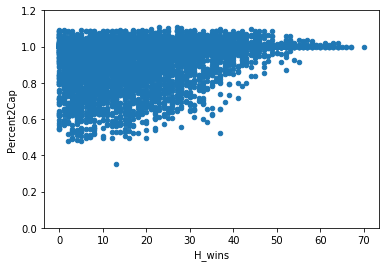

In [16]:

#scatter plot homewins/Percent2Cap
var = 'H_wins'
data = pd.concat([nba['Percent2Cap'], nba[var]], axis=1)
data.plot.scatter(x=var, y='Percent2Cap', ylim=(0,1.2));

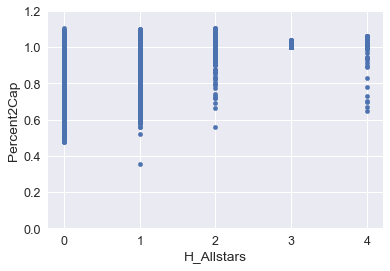

In [37]:
#scatter plot home allstars in game/Percent2Cap
var = 'H_Allstars'
data = pd.concat([nba['Percent2Cap'], nba[var]], axis=1)
data.plot.scatter(x=var, y='Percent2Cap', ylim=(0,1.2));

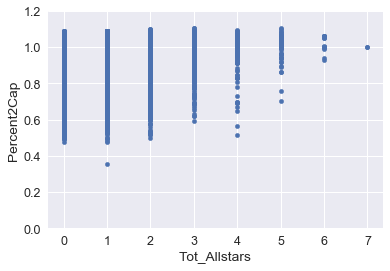

In [38]:
#scatter plot total allstars in game/Percent2Cap
nba['Tot_Allstars'] = nba['H_Allstars']+nba['V_Allstars']
var = 'Tot_Allstars'
data = pd.concat([nba['Percent2Cap'], nba[var]], axis=1)
data.plot.scatter(x=var, y='Percent2Cap', ylim=(0,1.2));

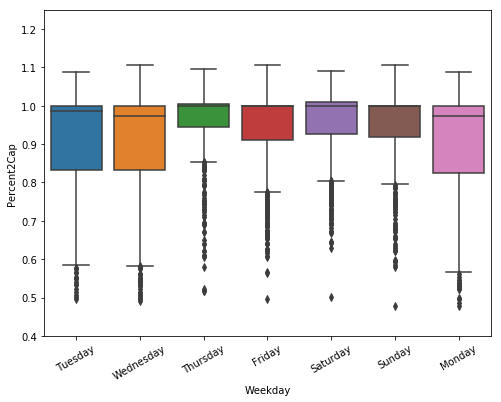

In [19]:
#Make weekday column
nba['Weekday'] = nba['Date'].dt.weekday_name
#box plot Date/Attendance by Weekday
var = 'Weekday'
data = pd.concat([nba['Percent2Cap'], nba[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Percent2Cap', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=.4, ymax=1.25);

In [20]:
#Make month column
nba['Month'] = nba['Date'].dt.month

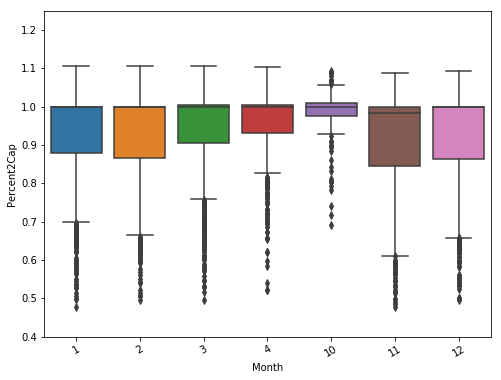

In [21]:
#box plot Date/Attendance by Weekday
var = 'Month'
data = pd.concat([nba['Percent2Cap'], nba[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Percent2Cap', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=.4, ymax=1.25);

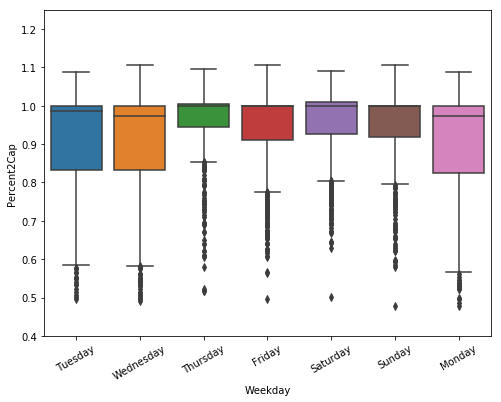

In [22]:
#Make weekday column
time = nba['Date'].dt.weekday_name
#box plot Date/Attendance by Weekday
var = 'Weekday'
data = pd.concat([nba['Percent2Cap'], nba[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='Percent2Cap', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=.4, ymax=1.25);

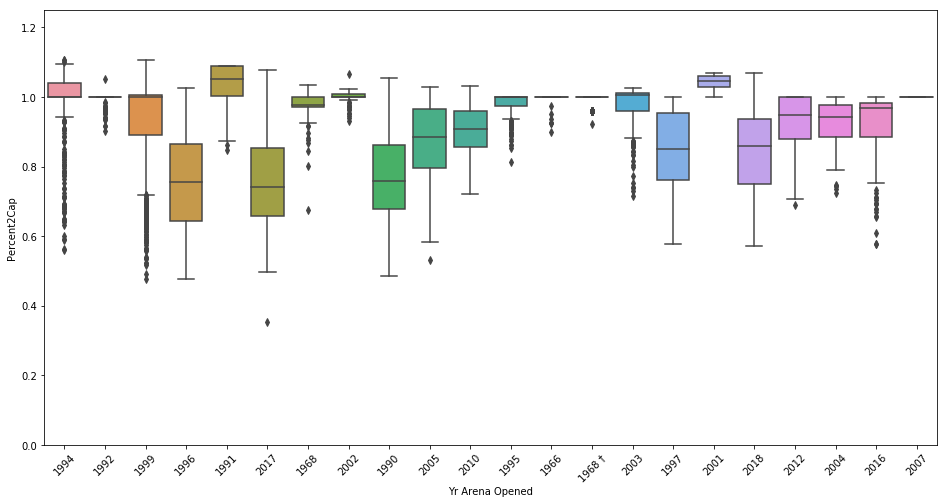

In [23]:
#Boxplot of year arena opened and capacity percentage
var = nba['Yr Arena Opened'] 
data = pd.concat((nba['Percent2Cap'], var), axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Percent2Cap', data=data)
fig.axis(ymin=0, ymax=1.25);
plt.xticks(rotation=45);

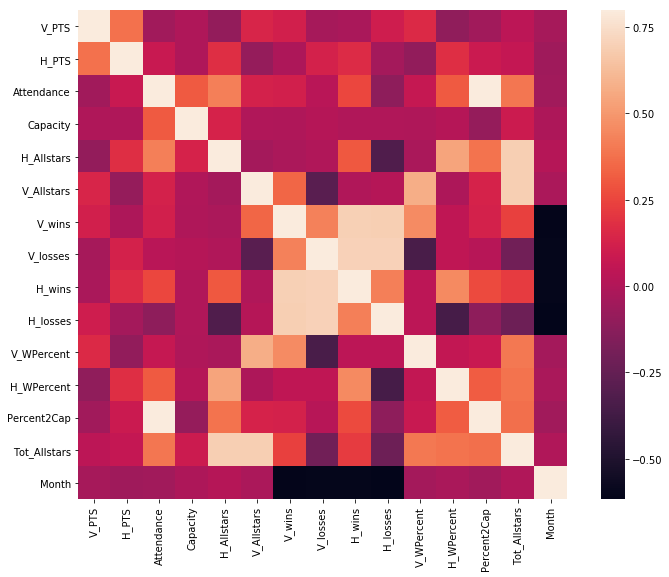

In [24]:
#correlation matrix
corrmat = nba.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

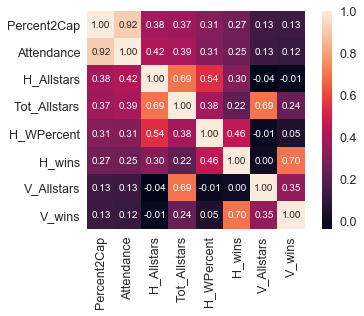

In [25]:
#Capacity correlation matrix
k = 8#number of variables for heatmap
cols = corrmat.nlargest(k, 'Percent2Cap')['Percent2Cap'].index
cm = np.corrcoef(nba[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)

plt.show()

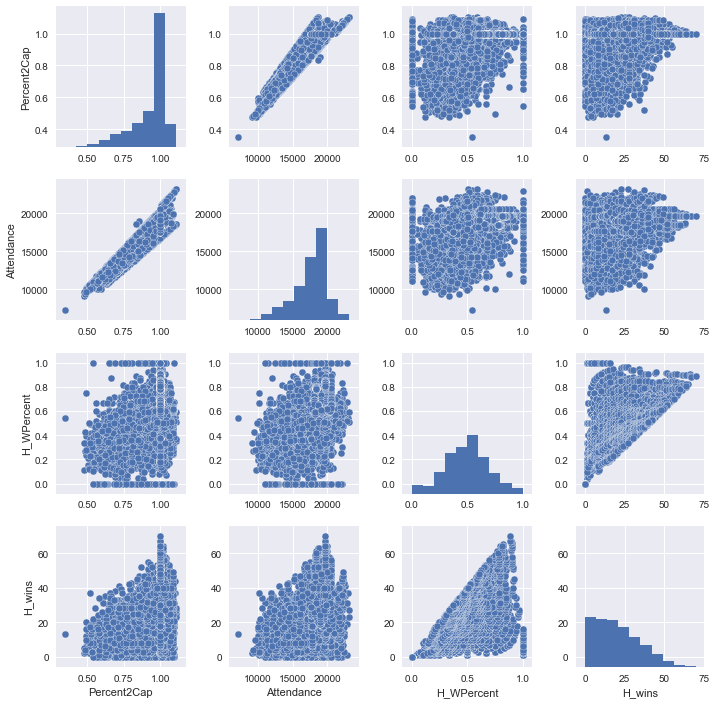

In [26]:
#scatterplot
sns.set()
cols = ['Percent2Cap','Attendance','H_WPercent','H_wins']
sns.pairplot(nba[cols], size = 2.5)
plt.show();

# Explore Individual teams (on going)

In [27]:
#look at perctange to capacity for each team
nba.groupby(['Home'])['Percent2Cap'].describe()

,count,mean,std,min,25%,50%,75%,max
Home,,,,,,,,
Atlanta Hawks,205.0,0.879295,0.139643,0.560879,0.762115,0.901203,1.000000,1.072249
Boston Celtics,204.0,0.978728,0.038230,0.812178,0.974187,1.000000,1.000000,1.000000
Brooklyn Nets,205.0,0.925242,0.086585,0.690334,0.884333,0.948962,1.000000,1.000000
Charlotte Hornets,205.0,0.868619,0.115549,0.531583,0.795251,0.885202,0.965456,1.029460
Chicago Bulls,205.0,1.039525,0.038258,0.560931,1.028350,1.040063,1.051585,1.106851
Cleveland Cavaliers,205.0,0.926058,0.120112,0.562008,0.870197,1.000000,1.000000,1.000000
Dallas Mavericks,205.0,1.042795,0.018100,1.001458,1.027552,1.046250,1.059323,1.068490
Denver Nuggets,205.0,0.817508,0.137607,0.477839,0.726964,0.820726,0.921483,1.049126
Detroit Pistons,205.0,0.757524,0.132235,0.353521,0.658289,0.742424,0.855254,1.077351


In [40]:
#Possibly start with 76ers since they have largest standard deviation in percentage to arena capacity
sixers = nba[nba['Home']=='Philadelphia 76ers']
sixers.head()

,Date,Visitor,V_PTS,Home,H_PTS,Attendance,Arena,Location,Capacity,Yr Arena Opened,...,V_wins,V_losses,H_wins,H_losses,V_WPercent,H_WPercent,Percent2Cap,Tot_Allstars,Weekday,Month
3,2012-10-31 19:00:00,Denver Nuggets,75,Philadelphia 76ers,84,19101,Wells Fargo Center,"Philadelphia, Pennsylvania",20328.0,1996,...,0,0,0,0,0.000000,0.000000,0.939640,1,Wednesday,10
38,2012-11-05 19:00:00,New York Knicks,110,Philadelphia 76ers,88,15783,Wells Fargo Center,"Philadelphia, Pennsylvania",20328.0,1996,...,2,0,1,1,1.000000,0.500000,0.776417,3,Monday,11
93,2012-11-12 19:00:00,Milwaukee Bucks,105,Philadelphia 76ers,96,15086,Wells Fargo Center,"Philadelphia, Pennsylvania",20328.0,1996,...,3,2,4,2,0.600000,0.666667,0.742129,1,Monday,11
107,2012-11-14 19:00:00,Detroit Pistons,94,Philadelphia 76ers,76,11879,Wells Fargo Center,"Philadelphia, Pennsylvania",20328.0,1996,...,0,7,4,3,0.000000,0.571429,0.584366,1,Wednesday,11
119,2012-11-16 19:00:00,Utah Jazz,93,Philadelphia 76ers,99,15851,Wells Fargo Center,"Philadelphia, Pennsylvania",20328.0,1996,...,4,5,4,4,0.444444,0.500000,0.779762,1,Friday,11
